In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,explained_variance_score,confusion_matrix,accuracy_score,classification_report,log_loss
import seaborn as sns

In [2]:
data_Switzerland = pd.read_excel('Switzerland.xlsx')
data_Switzerland.shape
data_Switzerland.head()
data_Switzerland.isnull().sum()
#data_Switzerland[data_Switzerland['Cholesterol']==0]

Location          0
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [3]:
data_Switzerland.head()

,Location,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,Switzerland,52,M,NAP,172,199,1,Normal,162,N,0.5,Up,0
1,Switzerland,64,M,TA,170,227,0,LVH,155,N,0.6,Flat,0
2,Switzerland,30,F,TA,170,237,0,ST,170,N,0.0,Up,0
3,Switzerland,42,M,NAP,160,147,0,Normal,146,N,0.0,Up,0
4,Switzerland,54,F,NAP,160,201,0,Normal,163,N,0.0,Up,0


In [4]:
#Investigating all features within a column

for columns in data_Switzerland:
    unique_values = np.unique(data_Switzerland[columns])
    count_values = len(unique_values)
    if count_values < 10:
        print('The number of values for feature {} is:{} -- {}'.format(columns,count_values,unique_values))
    else:
        print('The number of values for feature {} is:{}'.format(columns,count_values))

The number of values for feature Location is:1 -- ['Switzerland']
The number of values for feature Age is:36
The number of values for feature Sex is:2 -- ['F' 'M']
The number of values for feature ChestPainType is:4 -- ['ASY' 'ATA' 'NAP' 'TA']
The number of values for feature RestingBP is:34
The number of values for feature Cholesterol is:69
The number of values for feature FastingBS is:2 -- [0 1]
The number of values for feature RestingECG is:3 -- ['LVH' 'Normal' 'ST']
The number of values for feature MaxHR is:41
The number of values for feature ExerciseAngina is:2 -- ['N' 'Y']
The number of values for feature Oldpeak is:24
The number of values for feature ST_Slope is:3 -- ['Down' 'Flat' 'Up']
The number of values for feature HeartDisease is:2 -- [0 1]


In [5]:
data_Switzerland.columns
corr = data_Switzerland.corr()

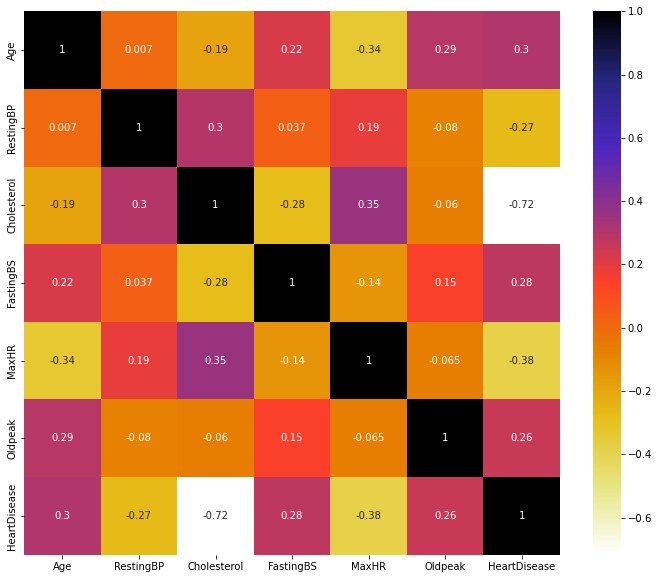

In [7]:
plt.figure(figsize=(12,10))
cor = data_Switzerland.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

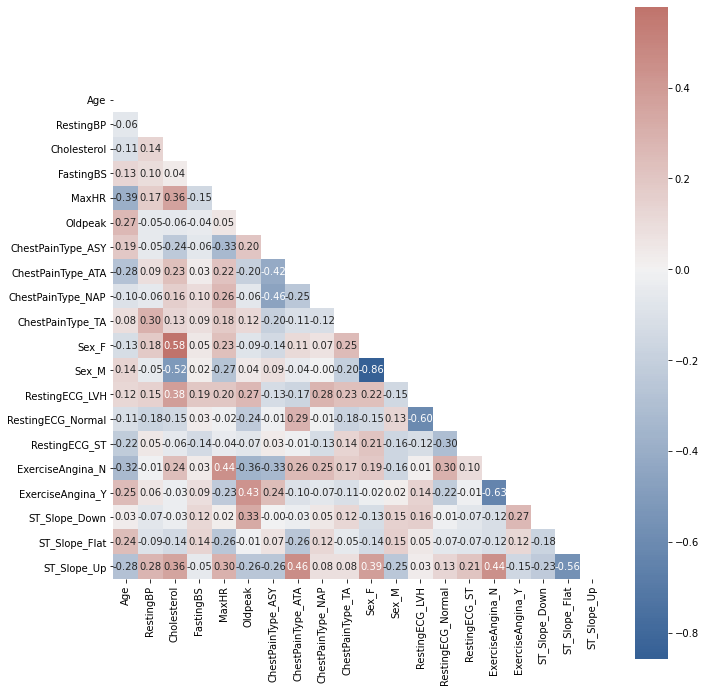

In [45]:
# Calculate pairwise-correlation
matrix = X_train.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(11, 12))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();

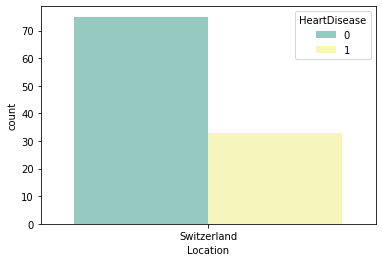

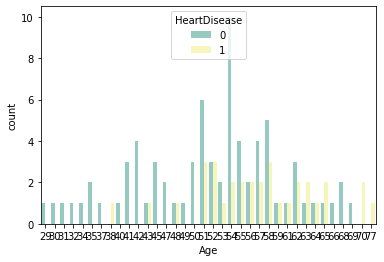

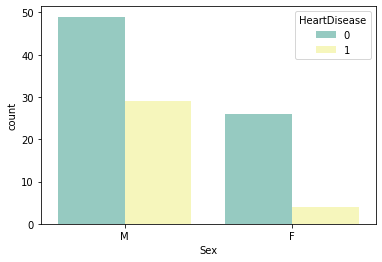

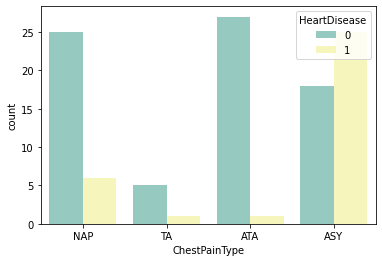

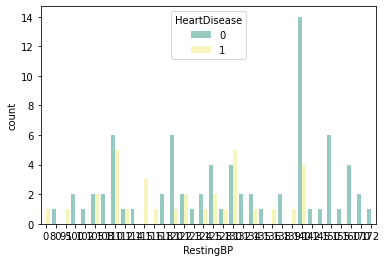

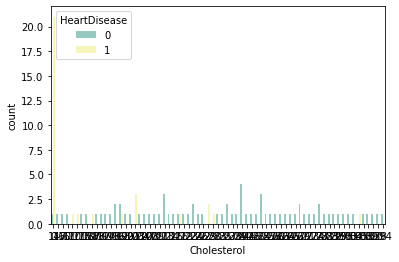

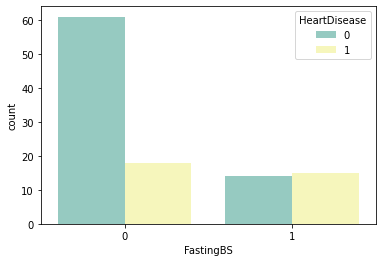

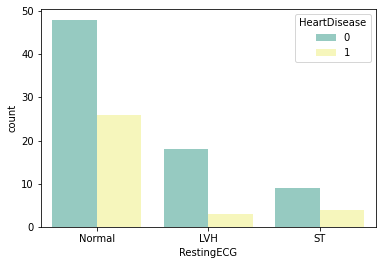

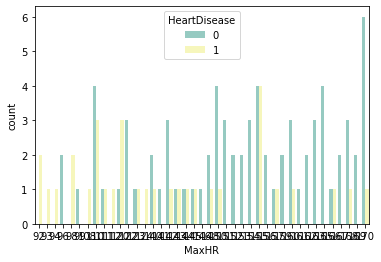

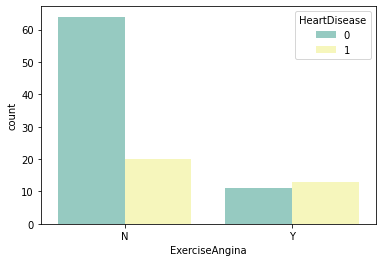

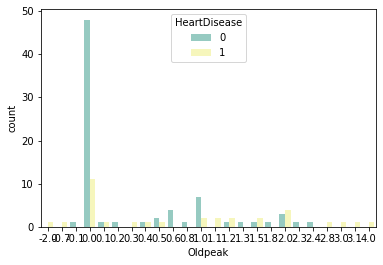

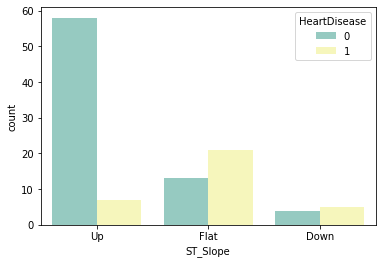

In [7]:
#Evaluating each feature and observing the affect on Y
feature = ['Location', 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope']

for f in feature:
    sns.countplot(x = f,data = data_Switzerland,palette='Set3',hue = 'HeartDisease')
    plt.show()

In [8]:
#Feature Selection
# Converting all variables 
Switzerland_data = pd.get_dummies(data_Switzerland,columns = ["ChestPainType", "Sex","RestingECG","ExerciseAngina","ST_Slope"],prefix=["ChestPainType", "Sex","RestingECG","ExerciseAngina","ST_Slope"])
Switzerland_data.shape


(108, 22)

In [70]:
Switzerland_data

,Location,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,...,Sex_F,Sex_M,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,Switzerland,52,172,199.000000,1,162,0.5,0,0,0,...,0,1,0,1,0,1,0,0,0,1
1,Switzerland,64,170,227.000000,0,155,0.6,0,0,0,...,0,1,1,0,0,1,0,0,1,0
2,Switzerland,30,170,237.000000,0,170,0.0,0,0,0,...,1,0,0,0,1,1,0,0,0,1
3,Switzerland,42,160,147.000000,0,146,0.0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
4,Switzerland,54,160,201.000000,0,163,0.0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Switzerland,58,100,213.000000,0,110,0.0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
104,Switzerland,31,100,219.000000,0,150,0.0,0,0,1,...,1,0,0,0,1,1,0,0,0,1
105,Switzerland,64,95,188.222222,1,145,1.1,1,1,0,...,1,0,0,1,0,1,0,1,0,0
106,Switzerland,53,80,188.222222,0,141,2.0,0,1,0,...,0,1,0,1,0,0,1,1,0,0


#As the ration of heartdisease is very different, we need to balance the dataset to avoid any bias in our model. We have used an oversampling technique to deal with the issue without loosing any data

In [9]:
X = Switzerland_data.drop(['HeartDisease','Location'],axis=1).values     # Predictor feature columns 
Y = Switzerland_data['HeartDisease'].values   # Predicted class (1=True, 0=False) 

/Users/saim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

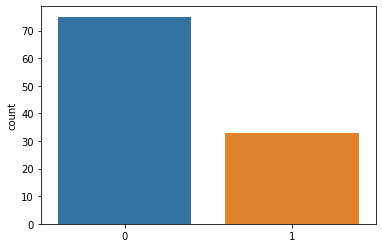

In [10]:
no_hd=data_Switzerland[data_Switzerland['HeartDisease']==0]
yes_hd=data_Switzerland[data_Switzerland['HeartDisease']== 1]
data_Switzerland['HeartDisease'].value_counts()

sns.countplot(Y)

In [11]:
#Handeling imbalances in dataset
from imblearn.combine import SMOTETomek
#Implementing oversampling for handeling imbalance
smk = SMOTETomek(random_state = 42)
X_res,y_res = smk.fit_resample(X,Y)

Original Dataset Shape Counter({0: 75, 1: 33})
Resampled Dataset Shape Counter({0: 74, 1: 74})


/Users/saim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

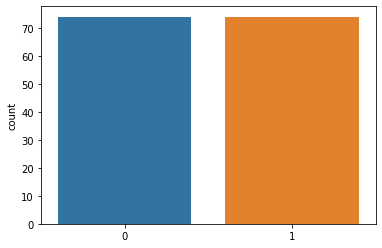

In [12]:
from collections import Counter
print('Original Dataset Shape {}'.format(Counter(Y)))
print('Resampled Dataset Shape {}'.format(Counter(y_res)))
sns.countplot(y_res)

Since Cholestrol Level Cannot be 0 we are replacing 0 with mean of the column 'Cholestrol'

In [13]:
# Handeling the cholestrol column 
Switzerland_data['Cholesterol'].replace(0,Switzerland_data['Cholesterol'].mean(),inplace=True)

In [68]:
print(Switzerland_data['Cholesterol'].mean())

226.56378600823052


# LOGISTIC REGRESSION

In [14]:
############# Applying Logistic Regression ##################
#X_logreg = Cleve_data[columns_to_keep].values
#y_logreg = Cleve_data['HeartDisease']

In [15]:
X_logreg = Switzerland_data.drop(['HeartDisease','Location'],axis=1)    # Predictor feature columns 
Y_logreg = Switzerland_data['HeartDisease']

In [16]:
#Resampling for Logistic Regression
X_new,y_new = smk.fit_resample(X_logreg,Y_logreg)

In [17]:
columns = X_logreg.columns

In [18]:
## Import CV and cheking model accuracy
#from sklearn.model_selection import cross_val_score
#logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
#print(cross_val_score(logreg,X_log,y_log,cv=10,scoring='accuracy').mean())

In [19]:
##### Splitting Data for Train , Test and Validate 

X_train, X_test, y_train, y_test  = train_test_split(X_new,y_new, train_size=0.7,test_size = 0.3, random_state = 55,stratify = y_new )



In [20]:
print(X_train.shape)
print(X_test.shape)


print(y_train.shape)
print(y_test.shape)



(102, 20)
(44, 20)
(102,)
(44,)


In [21]:
#Running Log model
model = LogisticRegression(solver='liblinear', max_iter=1000)
log_results=model.fit(X_train, y_train)

#Train Accuracy
print('Training accuracy is {}'.format(model.score(X_train,y_train)))
#predict on training set
y_pred_train = model.predict(X_train)
#Predictions using test set
y_pred = model.predict(X_test)

Training accuracy is 0.9313725490196079


Model Evaluation

In [22]:
#Accuracy Score Training Set
print('Training Set accuracy is {}'.format(model.score(X_train,y_train)))
# Accuracy of test set
print('Test Set accuracy is {}'.format(model.score(X_test,y_test)))

#Classification Report
print(classification_report(y_test,y_pred))

y_pred

Training Set accuracy is 0.9313725490196079
Test Set accuracy is 0.9090909090909091
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.91      0.91      0.91        22

    accuracy                           0.91        44
   macro avg       0.91      0.91      0.91        44
weighted avg       0.91      0.91      0.91        44



array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [23]:
model.coef_[0]

array([ 1.03144213e-01, -9.66679205e-03, -1.45905090e-02, -2.36931856e-01,
        2.26406563e-04,  9.08469257e-02,  8.48585964e-01, -9.19557263e-01,
       -6.80264360e-01, -8.94662369e-01, -5.22052314e-01, -4.25793348e-06,
       -9.63209688e-01,  2.12109172e-01, -6.89203374e-01, -7.82979850e-01,
       -4.64738406e-01, -1.25844071e-01, -1.25619981e-02, -2.09205924e+00])

In [24]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

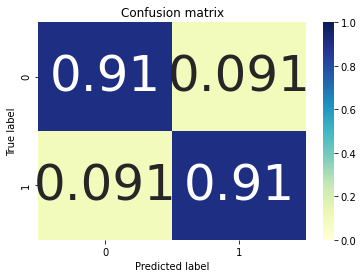

In [25]:
lr_cm = confusion_matrix(y_test,y_pred)
lrcm_norm = lr_cm/lr_cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(lrcm_norm,model.classes_)

In [26]:
# def get_feature_importance(model,feature_names):
#     feature_importance = (
#     pd.DataFrame({
#             'variable':columns,
#             'coefficient':model.coef_[0]
#                 }
#                 )
#     .round(decimals=4)\
#     .sort_values('coefficient',ascending = False).reset_index(drop = True)\
#     .style.bar(color=['red','green'],align='zero')\
#     )
#     return feature_importance
# get_feature_importance(model,columns)

In [27]:
my_dict = dict(zip(columns,model.coef_[0]))

In [28]:
all_features = pd.DataFrame({'variable':columns,'coefficient':model.coef_[0]}).round(decimals=4)\
.sort_values('coefficient',ascending = False).reset_index(drop=True)
#.set_index('variable')\

#

In [29]:
confusion_matrix(y_test,y_pred)


array([[20,  2],
       [ 2, 20]])

In [30]:
all_features.style.bar(color=['red','green'],align='zero')

,variable,coefficient
0,ChestPainType_ASY,0.848600
1,RestingECG_Normal,0.212100
2,Age,0.103100
3,Oldpeak,0.090800
4,MaxHR,0.000200
5,Sex_M,-0.000000
6,RestingBP,-0.009700
7,ST_Slope_Flat,-0.012600
8,Cholesterol,-0.014600
9,ST_Slope_Down,-0.125800


In [31]:
selected_features = all_features.drop([4,5,6,7,8])

In [32]:
selected_features = selected_features.reset_index(drop=True)

In [33]:
filtered= []
for i in selected_features['variable']:
    filtered.append(i)

In [34]:
#LOG REG WITH SELECTED FEATURES
new_lg_model = LogisticRegression(solver='liblinear', max_iter=1000)
X_lg_1 = Switzerland_data[filtered]
X_new_1,y_new_1 = smk.fit_resample(X_lg_1,Y_logreg)
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_new_1,y_new_1, train_size=0.7,test_size = 0.3, random_state = 55,stratify = y_new_1)
#Validation split
X_train_1,X_valid_1,y_train_1,y_valid_1 = train_test_split(X_train_1,y_train_1,train_size = 0.80 , test_size = 0.2,random_state=55,stratify=y_train_1)
new_lg_model.fit(X_train_1, y_train_1)
y_pred_1 = new_lg_model.predict(X_test_1)


In [35]:
#Accuracy Score Training Set
print('Training Set accuracy is {}'.format(new_lg_model.score(X_train_1,y_train_1)))
# Accuracy of test set
print('Test Set accuracy is {}'.format(new_lg_model.score(X_test_1,y_test_1)))

#Classification Report
print(classification_report(y_test_1,y_pred_1))

y_pred
predict_proba_1 = new_lg_model.predict_proba(X_test_1)

Training Set accuracy is 0.9620253164556962
Test Set accuracy is 0.9069767441860465
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.95      0.86      0.90        22

    accuracy                           0.91        43
   macro avg       0.91      0.91      0.91        43
weighted avg       0.91      0.91      0.91        43



In [36]:
new_scores = pd.DataFrame({'variable':filtered,'coefs':model.coef_[0]}).round(decimals=4)\
.sort_values('coefs',ascending = False).reset_index(drop=True)\
.style.bar(color=['red','green'],align='zero')

new_scores 

ValueError: All arrays must be of the same length

EVALUATION METRIC 2 - CONFUSION MATRIX

In [ ]:
#Visualizing CM
cm = confusion_matrix(y_test_1,y_pred_1)
print(cm)
# interms of percentage
cm_norm_1 = cm/cm.sum(axis=1).reshape(-1,1)
cm_norm_1

In [ ]:
y_pred_1.shape

In [ ]:
plot_confusion_matrix(cm_norm_1,new_lg_model.classes_)

PARAMETER TUNING FOR REDUCING LOGLOSS
TUNING THE C PARAM
We will loop over parameter C (Inverse of regularization strength).
Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum
The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5

A local minimum of a function is a point where the function value is smaller than at nearby points, but possibly greater than at a distant point. A global minimum is a point where the function value is smaller than at all other feasible points.

# CLASSIFICATION TREES

In [46]:
params = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,None],
    'min_samples_split':[0.`1,0.2,0.3],
    'min_samples_leaf':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2',None],
    'splitter':['best','random']
    
}

In [47]:
#Choosing best params using GridSearchCV
clf = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=params,cv=8,n_jobs=-1)

In [48]:
clf.fit(X_train,y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [0.1, 0.2, 0.3],
                         'splitter': ['best', 'random']})

In [49]:
x = clf.best_estimator_
print(x)

DecisionTreeClassifier(max_depth=2, min_samples_split=0.1, random_state=0,
                       splitter='random')


In [50]:
dt = x
dt.fit(X_train,y_train)
dt_y_pred= dt.predict(X_test)


In [51]:
print('The Train Data Accuracy is {}'.format(dt.score(X_train,y_train)))
print('The Test Data Accuracy is {}'.format(dt.score(X_test,y_test)))
print(classification_report(y_test,dt_y_pred))

The Train Data Accuracy is 0.8921568627450981
The Test Data Accuracy is 0.8409090909090909
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.86      0.82      0.84        22

    accuracy                           0.84        44
   macro avg       0.84      0.84      0.84        44
weighted avg       0.84      0.84      0.84        44



In [52]:
fi_col =[]
fi = []
from sklearn import metrics

#Running Feature Importance 
for i,column in enumerate(Switzerland_data.drop(['HeartDisease','Location'],axis=1)):
    print('The Feature importance for {} is:{}'.format(column,dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])
    

The Feature importance for Age is:0.0
The Feature importance for RestingBP is:0.0
The Feature importance for Cholesterol is:0.0
The Feature importance for FastingBS is:0.0
The Feature importance for MaxHR is:0.0
The Feature importance for Oldpeak is:0.0
The Feature importance for ChestPainType_ASY is:0.05659398792606266
The Feature importance for ChestPainType_ATA is:0.0
The Feature importance for ChestPainType_NAP is:0.0
The Feature importance for ChestPainType_TA is:0.0
The Feature importance for Sex_F is:0.0
The Feature importance for Sex_M is:0.0
The Feature importance for RestingECG_LVH is:0.21847926336957021
The Feature importance for RestingECG_Normal is:0.0
The Feature importance for RestingECG_ST is:0.0
The Feature importance for ExerciseAngina_N is:0.0
The Feature importance for ExerciseAngina_Y is:0.0
The Feature importance for ST_Slope_Down is:0.0
The Feature importance for ST_Slope_Flat is:0.0
The Feature importance for ST_Slope_Up is:0.7249267487043671


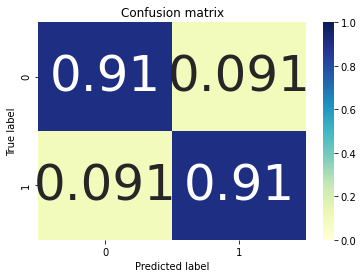

In [53]:
df_cm =confusion_matrix(y_test,y_pred)
df_cm
dfcm_percentage = df_cm/df_cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(dfcm_percentage,dt.classes_)

In [66]:
fi_df=zip(fi_col,fi)
fi_df = pd.DataFrame(fi_df,columns=['Feature','Feature Importance'])
importance = fi_df.sort_values('Feature Importance',ascending = False).reset_index(drop = True)
importance.style.bar(color=['red','green'],align='zero')


,Feature,Feature Importance
0,ST_Slope_Up,0.724927
1,RestingECG_LVH,0.218479
2,ChestPainType_ASY,0.056594
3,Sex_M,0.000000
4,ST_Slope_Flat,0.000000
5,ST_Slope_Down,0.000000
6,ExerciseAngina_Y,0.000000
7,ExerciseAngina_N,0.000000
8,RestingECG_ST,0.000000
9,RestingECG_Normal,0.000000


In [55]:
columns_to_keep = importance['Feature'][0:3]
Switzerland_data[columns_to_keep].shape

(108, 3)

In [56]:
dt_Switzerland = Switzerland_data[columns_to_keep]

In [57]:
print(dt_Switzerland.shape)
print(Y.shape)

(108, 3)
(108,)


In [58]:
dt_x,dt_y = smk.fit_resample(dt_Switzerland,Y)

In [59]:
x_train,x_test,Y_train,Y_test = train_test_split(dt_x,dt_y,test_size=0.3,stratify=dt_y)

In [60]:
clf_2 = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=params,cv=8,n_jobs=-1)

In [61]:
clf_2.fit(x_train,Y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [0.1, 0.2, 0.3],
                         'splitter': ['best', 'random']})

In [62]:
print(clf_2.best_estimator_)
x2 = clf_2.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_split=0.2,
                       random_state=0)


In [63]:
dt_2 = x2
dt_2.fit(x_train,Y_train)
dt_pred_2 = dt_2.predict(x_test)
dt_2.score(x_test,Y_test)

0.8222222222222222

In [64]:
print('The Train Data Accuracy is {}'.format(dt_2.score(x_train,Y_train)))
print('The Test Data Accuracy is {}'.format(dt_2.score(x_test,Y_test)))
print(classification_report(Y_test,dt_pred_2))

The Train Data Accuracy is 0.8666666666666667
The Test Data Accuracy is 0.8222222222222222
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        22
           1       0.78      0.91      0.84        23

    accuracy                           0.82        45
   macro avg       0.83      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45



[[16  6]
 [ 2 21]]


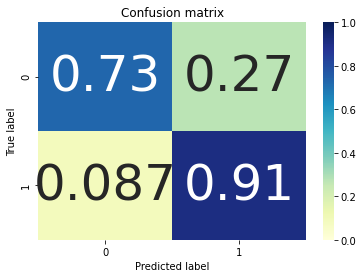

In [65]:
df_cm_2 =confusion_matrix(Y_test,dt_pred_2)
print(df_cm_2)
df2_norm = df_cm_2/df_cm_2.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(df2_norm,dt_2.classes_)